In [1]:
import seaborn as sns

titanic = sns.load_dataset('titanic')
print(titanic)

     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alo

In [2]:
import pandas as pd

titanic.to_csv('./csv/titanic.csv', index=False)


In [3]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [4]:
titanic['age'] = titanic['age'].fillna(titanic['age'].median())
titanic['age'].isnull().sum()

0

In [5]:
titanic['embarked'].value_counts()
titanic['embarked'] = titanic['embarked'].fillna('S')

In [6]:
titanic['embark_town'].value_counts()
titanic['embark_town'] = titanic['embark_town'].fillna('Southampton')

In [7]:
titanic['deck'] = titanic['deck'].fillna('C')

In [8]:
titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [9]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         891 non-null    category
 12  embark_town  891 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [10]:
titanic['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

### 시각화 Matplotlib

Text(0.5, 1.0, 'Female')

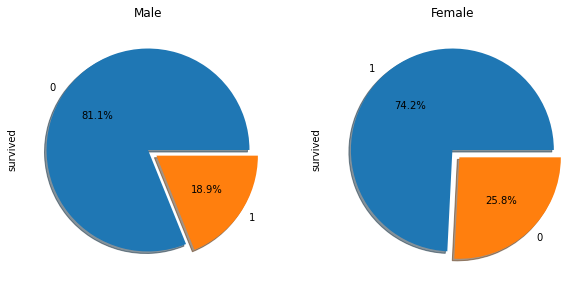

In [11]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1,2, figsize=(10,5))
titanic['survived'][titanic['sex'] == 'male'].value_counts().plot.pie(explode =[0,0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
titanic['survived'][titanic['sex'] == 'female'].value_counts().plot.pie(explode =[0,0.1], autopct='%1.1f%%', ax=ax[1], shadow=True)
ax[0].set_title('Male')
ax[1].set_title('Female')

Text(0.5, 1.0, 'Class / Who')

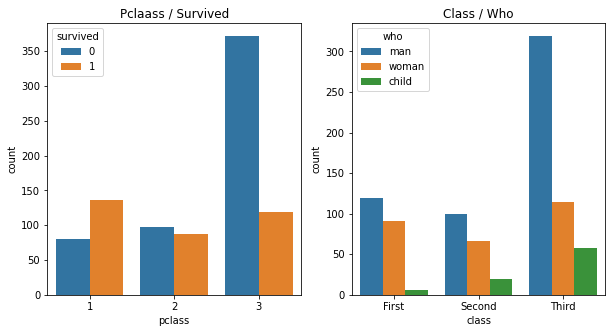

In [12]:
fig = plt.figure(figsize=(10,5))

area01 = fig.add_subplot(1,2,1)
sns.countplot(x = 'pclass', hue='survived', data=titanic, ax=area01)
area01.set_title('Pclaass / Survived')

area02 = area01 = fig.add_subplot(1,2,2)
sns.countplot(x = 'class', hue='who', data=titanic, ax=area02)
area01.set_title('Class / Who')

In [13]:
titanic_corr = titanic.corr(method='pearson')
titanic_corr

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,0.247704,0.171647
sibsp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.247704,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.171647,-0.584471,-0.583398,-0.271832,0.404744,1.000000


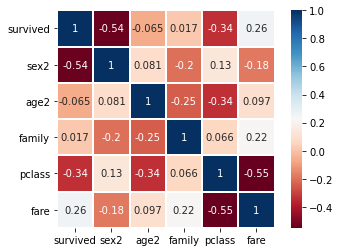

In [14]:
def category_age(x):
    return  x / 10

titanic['age2'] = titanic['age'].apply(category_age)
titanic['sex2'] = titanic['sex'].map({'male': 1, 'female' : 0})
titanic['family'] = titanic['sibsp'] + titanic['parch']+1
titanic.to_csv('./csv/titanic2.csv', index=False)

heatmap_data = titanic[['survived', 'sex2', 'age2', 'family', 'pclass', 'fare']]
colormap = plt.cm.RdBu 
sns.heatmap(heatmap_data.astype(float).corr(),
            linewidths=0.1, vmax=1.0,
            square=True, cmap= colormap,
            linecolor = 'white', annot=True,
            annot_kws={'size':10})       

plt.show()



In [ ]:
sns.pairplot(titanic, hue='survived')